# Investigate a Dataset - No-Show appointments

## Table of Content
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 
> No-show appointments Dataset contains information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. 

> - **Name:** No-show appointments
> - **Source:** <a href="https://www.kaggle.com/datasets/joniarroba/noshowappointments">Kaggle</a>
> - **Purpose:** Investigate the dataset to answer the analysis questions.
> - **Time Period:** During Studing Data Analyst Nanodegree at udacity-jun. 2024.

### Variables description
>A number of characteristics about the patient and the appointments are included in each row.
> <ul>
    <li><b>PatientId</b> <br> Identification of a patient </li>
    <li><b>AppointmentID</b> <br> Identification of each appointment </li>
    <li><b>Gender </b><br> Male or Female </li>
    <li><b>ScheduledDay </b><br> The day that the patient set up their appointment. </li>
    <li><b>AppointmentDay </b><br> The day of the actuall appointment, when they have to visit the doctor. </li>
    <li><b>Age </b><br> How old is the patient. </li>
    <li><b>Neighbourhood</b> <br> Where the appointment takes place. </li>
    <li><b>Scholarship</b><br> True or False. indicates whether or not the patient is enrolled in Brasilian welfare program </li>
    <li><b>Hipertension</b><br> True or False. If the patient have Hypertension </li>
    <li><b>Diabetes</b><br> True or False. If the patient have Diabetes </li>
    <li><b>Alcoholism</b><br> True or False. If the patient have Alcoholism </li>
    <li><b>Handcap</b><br> True or False. If the patient have Handcap </li>
    <li><b>SMS_received</b><br> 1 or more messages sent to the patient. </li>
    <li><b>No-show</b><br> ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up. </li>
</ul>


### Questions for Analysis
<ul>
    <li>Does the the period between the ScheduledDay and the AppointmentDay affects the No-show result?</li>
    <li>What features are associated with patients not showing there appointments?</li>
</ul>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

<a id='wrangling'></a>
## Data Wrangling
> let's read the Data and explore it.

In [2]:
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
df.shape

(110527, 14)

In [4]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


As seen above there is some outliers in the Age column and handcap. In the handcap column the values are true or false only but there seem to be values grater than 1 and these must be removed. In the age column there is a negativ value and this value must be changed.

In [5]:
# check rows have Age values less than 0
mask = df['Age'] < 0
df[mask]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [6]:
#change the negative age values into 0
df.loc[mask, 'Age'] = 0
#check the value again
df[mask]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,0,ROMÃO,0,0,0,0,0,0,No


In [7]:
# check rows have Handcap values more than 1
mask = df['Handcap'] > 1
df[mask]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
946,7.282582e+13,5582483,M,2016-04-14T09:26:08Z,2016-04-29T00:00:00Z,94,BELA VISTA,0,1,1,0,2,1,No
1665,1.242919e+13,5525497,M,2016-03-30T09:16:41Z,2016-04-29T00:00:00Z,64,SANTA MARTHA,0,1,0,1,2,1,No
1666,1.242919e+13,5525498,M,2016-03-30T09:16:41Z,2016-04-29T00:00:00Z,64,SANTA MARTHA,0,1,0,1,2,0,No
2071,1.242919e+13,5640120,M,2016-04-29T10:08:48Z,2016-04-29T00:00:00Z,64,SANTA MARTHA,0,1,0,1,2,0,No
2091,1.491829e+13,5638626,F,2016-04-29T08:13:59Z,2016-04-29T00:00:00Z,11,ANDORINHAS,0,0,0,0,2,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108376,2.387212e+14,5756931,F,2016-06-01T08:48:28Z,2016-06-07T00:00:00Z,44,ROMÃO,0,1,1,0,2,1,No
109484,3.589495e+14,5752442,M,2016-05-31T11:45:57Z,2016-06-02T00:00:00Z,64,DA PENHA,0,1,1,0,2,0,No
109733,5.662976e+14,5772744,F,2016-06-03T16:11:00Z,2016-06-07T00:00:00Z,34,JUCUTUQUARA,0,0,0,0,2,1,No
109975,4.522185e+13,5766970,M,2016-06-02T16:07:36Z,2016-06-06T00:00:00Z,39,PRAIA DO SUÁ,1,0,0,0,2,1,No


In [8]:
#change the Handcap values greater than 1 into 1
df.loc[mask, 'Handcap'] = 1
#check the value again
df[mask]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
946,7.282582e+13,5582483,M,2016-04-14T09:26:08Z,2016-04-29T00:00:00Z,94,BELA VISTA,0,1,1,0,1,1,No
1665,1.242919e+13,5525497,M,2016-03-30T09:16:41Z,2016-04-29T00:00:00Z,64,SANTA MARTHA,0,1,0,1,1,1,No
1666,1.242919e+13,5525498,M,2016-03-30T09:16:41Z,2016-04-29T00:00:00Z,64,SANTA MARTHA,0,1,0,1,1,0,No
2071,1.242919e+13,5640120,M,2016-04-29T10:08:48Z,2016-04-29T00:00:00Z,64,SANTA MARTHA,0,1,0,1,1,0,No
2091,1.491829e+13,5638626,F,2016-04-29T08:13:59Z,2016-04-29T00:00:00Z,11,ANDORINHAS,0,0,0,0,1,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108376,2.387212e+14,5756931,F,2016-06-01T08:48:28Z,2016-06-07T00:00:00Z,44,ROMÃO,0,1,1,0,1,1,No
109484,3.589495e+14,5752442,M,2016-05-31T11:45:57Z,2016-06-02T00:00:00Z,64,DA PENHA,0,1,1,0,1,0,No
109733,5.662976e+14,5772744,F,2016-06-03T16:11:00Z,2016-06-07T00:00:00Z,34,JUCUTUQUARA,0,0,0,0,1,1,No
109975,4.522185e+13,5766970,M,2016-06-02T16:07:36Z,2016-06-06T00:00:00Z,39,PRAIA DO SUÁ,1,0,0,0,1,1,No


In [9]:
#check the null values and the data types of the column
print(df.info())
print(df.nunique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB
None
PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledD

Since the PatientId and AppointmentID are identification number, better to be objects, the Gender and No-show values contains only two values so better to be category. Neighbourhood contains small number of values so category is better, and ScheduledDay and ScheduledDay are timestamp so must be Datetime values. While the max value of the age is 115 so int8 is good, and the last 6 attributes must be bool

In [10]:
#set PatientId and AppointmentID to Objects 
df = df.astype({'PatientId' : 'object', 'AppointmentID' : 'object'})

#set Gender, Neighbourhood and No-show to Category 
df = df.astype({'Gender' : 'category', 'Neighbourhood' : 'category', 'No-show' : 'category'})

#set ScheduledDay and AppointmentDay to datetime
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])
#set age to int8
df = df.astype({'Age' : 'int8'})
#set Scholarship, Hipertension, Diabetes, Alcoholism, Handcap and SMS_received to boolean 
df = df.astype({'Scholarship' : 'boolean', 'Hipertension' : 'boolean', 'Diabetes' : 'boolean',
                'Alcoholism' : 'boolean', 'Handcap' : 'boolean', 'SMS_received' : 'boolean'})
#check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110527 non-null  object             
 1   AppointmentID   110527 non-null  object             
 2   Gender          110527 non-null  category           
 3   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 5   Age             110527 non-null  int8               
 6   Neighbourhood   110527 non-null  category           
 7   Scholarship     110527 non-null  boolean            
 8   Hipertension    110527 non-null  boolean            
 9   Diabetes        110527 non-null  boolean            
 10  Alcoholism      110527 non-null  boolean            
 11  Handcap         110527 non-null  boolean            
 12  SMS_received    110527 non-null  boolean            
 13  No-show       

<a id='eda'></a>
## Exploratory Data Analysis

In [13]:
# Function for Scatter plot using matplotlib

def myPlot(df, col1, col2, title) :
    plt.figure(figsize=(6, 5))
    plt.scatter(df[col1], df[col2], alpha=0.2)
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.title(title)
    plt.show()
    

<Axes: ylabel='count'>

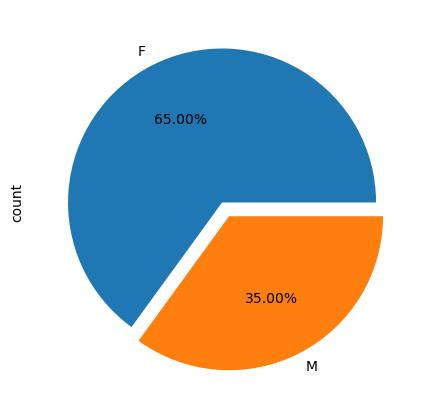

In [15]:
# percent of males and females

df['Gender'].value_counts().plot.pie(figsize=(6,5), explode=(0,0.1), autopct='%1.2f%%')

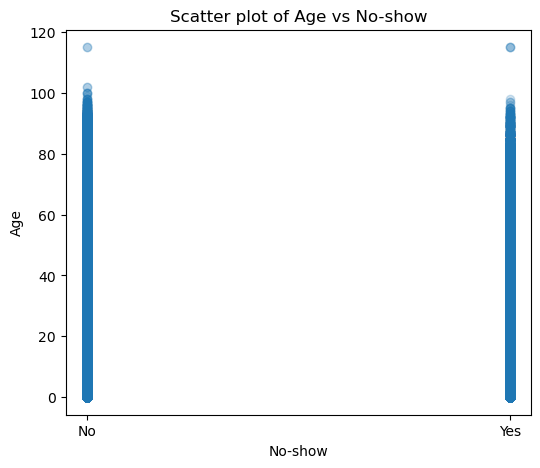

In [26]:
myPlot(df, 'No-show', 'Age', 'Scatter plot of Age vs No-show')

This plots shows that the age does not realy affects showing the appointments.

### Research Question 1: Does the the period between the ScheduledDay and the AppointmentDay affects the No-show result?
> We need to get a new data fram that contains only no showing appointments

In [16]:
df['periods'] = df['AppointmentDay'] - df['ScheduledDay']
df['period_seconds'] = df['periods'].dt.total_seconds()

In [17]:
df_no = df.query('`No-show` == "No"')
df_yes = df.query('`No-show` == "Yes"')

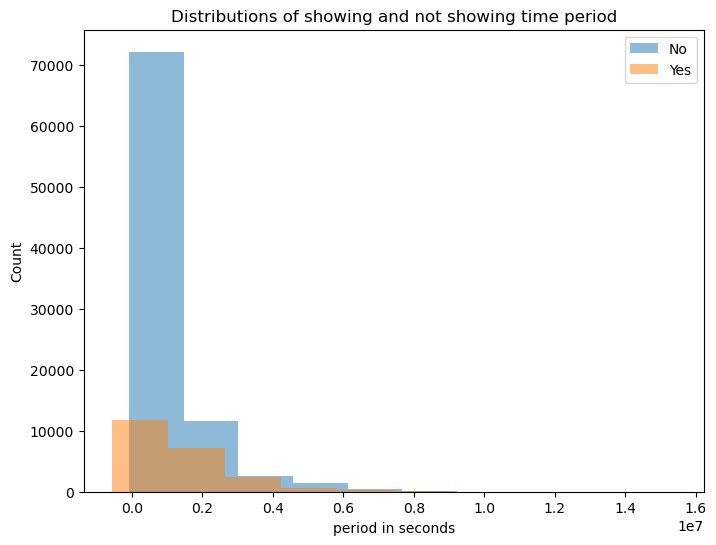

In [18]:
# Create a histogram plot
ax = df_no['period_seconds'].plot(x='period_seconds',alpha=0.5, figsize=(8, 6), label='No', kind='hist');

df_yes['period_seconds'].plot(kind='hist',alpha=0.5, figsize=(8, 6), label='Yes', ax=ax);

ax.set_title('Distributions of showing and not showing time period')
ax.set_xlabel('period in seconds');
ax.set_ylabel('Count');
ax.legend(loc='upper right');

The plot shows that the scedualing days closed to the appointment days are always showed while the long period between the scedualing day and the appointment does not really affects the show.

### Research Question 2: What features are associated with pationts showing and not showing there appointments?
> Here we will use the splited data frames for showing and not showing the appointment to create new data frames contains the features to compare

<Axes: >

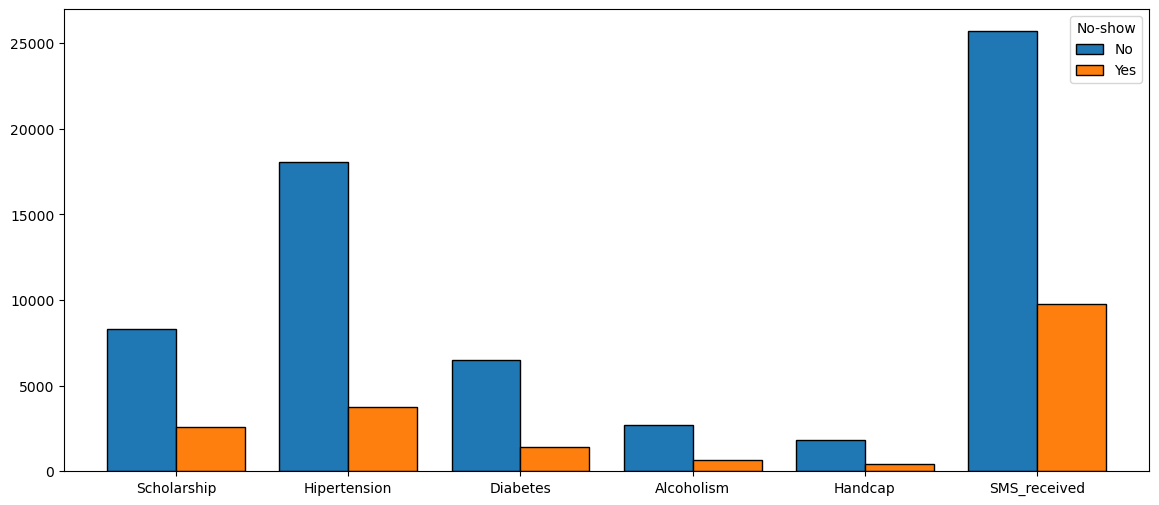

In [19]:
#First let's draw the features from original data frame before spliting
df.groupby('No-show')[['Scholarship','Hipertension','Diabetes','Alcoholism',
                       'Handcap','SMS_received']].sum().T.plot.bar(edgecolor='black', figsize=(14,6), rot=0,width=0.8)

<Axes: ylabel='count'>

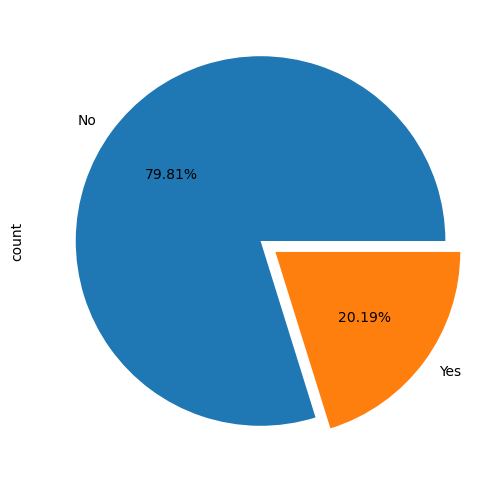

In [20]:
df['No-show'].value_counts().plot.pie(figsize=(14,6), explode=(0,0.1), autopct='%1.2f%%')

In [21]:
def prntshape(df1, df2) :
    print(df1.shape)
    print(df2.shape)
prntshape(df_no, df_yes)

(88208, 16)
(22319, 16)


since the number of appointments not showed and size of the two data frames are not equal we need to equalize them and then compare features to get an accurate result

In [22]:
df_no = df_no.iloc[:22319]
prntshape(df_no, df_yes)

(22319, 16)
(22319, 16)


In [23]:
#create new data frames that contains the features to compare
new_df_no = pd.DataFrame(
    {
        'Scholarship' : df_no['Scholarship'],
        'Hipertension' : df_no['Hipertension'],
        'Diabetes' : df_no['Diabetes'],
        'Alcoholism' : df_no['Alcoholism'],
        'Handcap' : df_no['Handcap'],
        'SMS_received' : df_no['SMS_received']
    }
)
new_df_yes = pd.DataFrame(
    {
        'Scholarship' : df_yes['Scholarship'],
        'Hipertension' : df_yes['Hipertension'],
        'Diabetes' : df_yes['Diabetes'],
        'Alcoholism' : df_yes['Alcoholism'],
        'Handcap' : df_yes['Handcap'],
        'SMS_received' : df_yes['SMS_received']
    }
)

<Axes: title={'center': 'features are associated with showing and not showing there appointments'}, xlabel='Feature', ylabel='summation of values'>

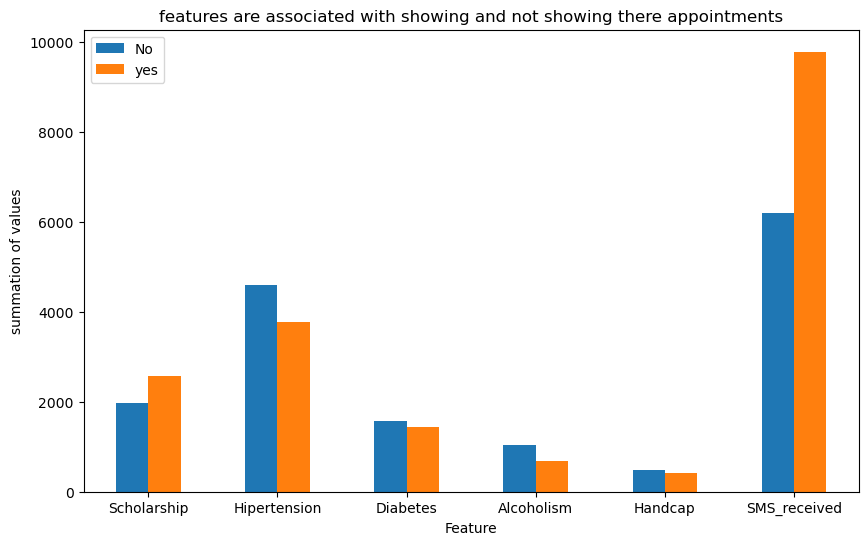

In [24]:
pd.DataFrame({
    "No": new_df_no.sum(),
    "yes": new_df_yes.sum()
}).plot(
    kind='bar',
    title='features are associated with showing and not showing there appointments',
    legend=True,
    xlabel="Feature",
    ylabel="summation of values",
    rot=0,
    figsize=(10, 6)
)

>The SMS_received is higher for the people showing thir appointments also the scholership,  but the other features are higher for people not showing there appointment, mostly these features affect the pationt to show or not

<a id='conclusions'></a>
## Conclusions
>The analysis shows that the number of pationts not showing there appointments are grater than the pationts showing there appointments. Reffering to the visualizations we'v done, there may be some attributes that affects showing the appointemnt, like when the difference between the schedualed day and the appointemnt day is very small then the showing percentage is higher while the long difference between them does not really affects. 
Other attributes that affects the showing is SMS_recived and the scholership are clearly higher for pationts showing there appointments.

> The provided Neighbourhood where not helping in discovering the attributes that affects the patient shows, we may explore if some Neighbourhoods are clearly have less showing, but it would be better if the Neighbourhood of the patient is also provided, that will help us to check if the going from a neighbourhood to another to show an appointment will affect the showing or not.

In [25]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

4294967295